<h1><center>Laboratorio 1: Primeros pasos 👣</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Diego Irarrázaval

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `http://....`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar:

- Programación orientada a objetos.
- Programación funcional.
- Librería Numpy para manejo de datos en arreglos/tensores.

## Reglas:

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

El lab estará basado en algunos conceptos básicos de procesamiento de imágenes, por lo que te iremos guiando, paso a paso por cada uno de los tópicos a desarrollar.

## Descripción del laboratorio.

En Data Science son múltiples las aplicaciones que exigen el uso exhaustivo de arreglos de varias dimensiones. Estas entidad reciben formalmente el nombre de **tensores**.

Pensemos en que queremos almacenar objetos en un casillero común y corriente: podemos pensar que este puede ser representado por una matriz de dos dimensiones: alto y ancho. ¿Que sucederá si este casillero nos queda pequeño y queremos guardar más información del mismo tipo?: La solución es simple es agregar otro casillero. Esto puede ser pensado como el aumento de la dimensión de nuestro objeto, pasando a ser ahora (alto, ancho, id casillero). Esto no es otra cosa que un **tensor de 3 dimensiones**.

<br>
<center>
<img src="https://drive.google.com/uc?export=view&id=1tb7popMBUSSj4YzD-Ypytoo6n7PbXzuJ" width=300 height=300 />
</center>
<br>

### ¿Bueno y que tiene que ver todo esto con las imágenes?

Una imagen es una representación visual que reune intensidades de pixeles en un objeto. Esto visto desde la perspectiva de una imagen en blanco y negro, vendria siendo una matriz que reune las diferentes intensidades de los pixeles desde 0 a 255.

<br>
<center>
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png" width=500 height=500 alt="Representación de una imagen" />
</center>
<br>

Cuando las imágenes poseen colores, las imágenes vendrían siendo "sin querer queriendo", una bella representación de lo que es un tensor: estas pueden ser representadas por un tensor de 3 dimensiones que les dan el *ancho, alto y el canal*, en donde son alojados los colores de la imagen.

<br>
<center>
<img src="https://miro.medium.com/max/2146/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Como pueden ver, la imagen puede ser interpretada como un tensor de tres dimensiones(un ancho, un alto y la intensidad de cada color) en el a cada posición $(i,j)$ de la imagen, le asociaremos 3 intensidades de colores RGB (Rojo, Verde y Azul). Estas intensidades irán desde el $0$ al $255$. La combinación de estos 3 canales nos permitirá representar gran parte de los colores que encontramos en la naturaleza.

**Instalar paquetes: Si están usando conda**


In [ ]:
import sys

!conda install --yes --prefix {sys.prefix} pillow plotly imageio

**Instalar paquetes: Si están usando pip**


In [ ]:
import sys

!{sys.executable} -m pip install pillow plotly imageio

**En caso de trabajar con colab:**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/My Drive/CuerpoDocente/Laboratorios/Lab1-Numpy/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# En este lab usaremos adicionalmente pillow, una estupenda librería para manejar imágenes.
# https://pillow.readthedocs.io/en/stable/
from PIL import Image 
import numpy as np
import plotly.express as px


path1 = path+'images_lab/'
foto = np.array(Image.open(path1 + 'cobija.PNG').convert('RGB'))
fig = px.imshow(foto)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Luego, llamando la variable donde alojamos el array podemos ver los valores que componen a esta imagen.

In [ ]:
foto

array([[[ 46,  22,   1],
        [ 48,  25,   3],
        [ 55,  31,  10],
        ...,
        [ 10,   7,   6],
        [ 10,   6,   5],
        [ 11,   7,   7]],

       [[ 66,  45,  27],
        [ 69,  48,  30],
        [ 71,  50,  32],
        ...,
        [ 13,   9,   8],
        [ 12,   8,   8],
        [ 12,   8,   7]],

       [[ 75,  56,  41],
        [ 77,  58,  43],
        [ 77,  58,  43],
        ...,
        [ 15,  11,  10],
        [ 14,  10,  10],
        [ 13,   9,   9]],

       ...,

       [[126,  95,  79],
        [133, 101,  86],
        [131, 100,  84],
        ...,
        [127,  96,  77],
        [135, 104,  85],
        [150, 119,  99]],

       [[125,  94,  78],
        [132, 101,  86],
        [127,  95,  80],
        ...,
        [154, 123, 103],
        [160, 129, 110],
        [149, 118,  98]],

       [[119,  88,  72],
        [138, 106,  91],
        [139, 108,  93],
        ...,
        [149, 118,  98],
        [150, 120, 100],
        [141, 110,  91]]

In [ ]:
print(f'Número de dimensiones: {foto.ndim}')
print(f'Número de elementos por dimensión: {foto.shape}')

Número de dimensiones: 3
Número de elementos por dimensión: (470, 597, 3)


Finalmente visualizamos de forma aleatoria los pixeles de cada canal para mostrar sus intensidades.

In [ ]:
print(f"Ejemplo de pixel (10, 200) en el canal 0 - Red: {foto[10, 200, 0]}")
print(f"Ejemplo de pixel (10, 200) en el canal 1- Green: {foto[10, 200, 1]}")
print(f"Ejemplo de pixel (10, 200) en el canal 2- Blue: {foto[10, 200, 2]}")

Ejemplo de pixel (10, 200) en el canal 0 - Red: 97
Ejemplo de pixel (10, 200) en el canal 1- Green: 70
Ejemplo de pixel (10, 200) en el canal 2- Blue: 48


Con lo anterior, suponiendo que la imagen del "gatito" tiene una altura igual a 600 y un ancho de 400, el tensor $G$ que representa a la imagen vendrá dado por $G[600, 400, 3]$. 

### VIdeos

Luego, si queremos complejizar aún mas esto y queremos tener tensores que agrupen un conjunto de imágenes (de igual tamaño) tendremos lo siguiente:


<br>
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRk4BWrH_xi_blsx9Y32OTT8k80vI90udG-Yg&usqp=CAU" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Este conjunto de imágenes nos generará la necesidad de producir una nueva dimensión, esto producto que las dimensiones son los espacios donde alojamos la información, por esto al conjunto de imágenes le agregaremos una dimensión que identifica cada una de las imágenes del conjunto, quedando representada por el tensor $G[0:n_d, 600, 400, 3]$. Por lo general, cuando tenemos imágenes con dimensionalidad 4 es porque se tratan de videos, o sea una secuencia de imágenes; el caso se complejiza aún más cuando agregamos sonido y esto se va a las pailas.

<blockquote>Dato:
La representación que posee cada una de las dimensiones puede cambiar dependiendo de la librería utilizada, en pytorch por ejemplo las dimensiones de una imagen vienen dadas por [batch, canales, alto, ancho] y no [batch, alto, ancho, canales] como en numpy.
</blockquote>


### ¿Ya, pero esto tiene aplicaciones más allá de guardar información en casilleros?

Para el caso de imágenes podemos encontrar múltiples aplicaciones con la manipulación de los tensores y operando matemáticamente con ellos. Algunas de las aplicaciones más conocidas (y que aplicaremos) son las siguientes:

- Obtener el negativo de una imagen: Consiste en obtener el color complementario de una imagen, para esto debemos restar la imagen con la máxima intensidad que podemos encontrar en una imagen (o sea 255).
    
    
- Pasar a escala de grises una imagen: Los valores RGB se convierten a escala de grises mediante la fórmula NTSC: 
    
    \begin{equation*}
    imagen\_gris = 0.299 * Rojo + 0.587 * Verde + 0.114 * Azul \tag{1}
    \end{equation*}
    
    Esta fórmula representa la percepción relativa de la persona promedio del brillo de la luz roja, verde y azul.
    
    
- Mejora de contraste: Son múltiples las técnicas que nos permiten mejorar el contraste de una imagen, pero, una técnica simple para modificar los contrastes consta en obtener un factor de corrección llamado F en base al contraste deseado (C). Luego, es aplicado en la diferencia entre la imagen y 128. De esta forma obtenemos R, que es la imagen con la mejora de contraste deseada.

    \begin{equation*}
    F=259*(C+255)/(255*(259-C))
    \end{equation*}
    \begin{equation*}
    R=F*(img-128)+128
    \end{equation*}
  
  
- Convolución: Consiste en recorrer una imagen por cada uno de sus canales utilizando una matriz que lleva por nombre Kernel. El kernel, examinará los conjuntos de pixeles que recorre, aplicando una multiplicación de los valores circundantes ,y sumando todos los valores generados de este producto para generar un nuevo pixel en el tensor de salida.

![conv](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif "miracomorecorre")

---

# Desarrollo

En base a lo explicado y visto en clases, a continuación, deben construir cada uno de los programas solicitados en las actividades señaladas más abajo. Estás, deben ser desarrollados de forma grupal (**2 personas por grupo**) y, la solución no debe ser compartida con personas externas al grupo; si se detecta que dos grupos entregan el mismo trabajo, será considerado plagio y se tomaran medidas al respecto.

## 1. Creación de repositorio [0,5 ptos].

Como grupo creen un repositorio en `Github` en donde desarrollen los laboratorios del curso, esto tendrá como fin que trabajen de forma colaborativa y aprovechen las herramientas que ofrece esta plataforma. Al finalizar el trabajo de este laboratorio, adjunten el enlace del Github/Bitbucket/etc... y deberá agregar como colaboradores a el ayudante y auxiliar. **Adjuntar enlace en el inicio de este documento**.

## 2. Creación de Clases y Funciones.

#### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
from pathlib import Path

# Librerias para graficar
import plotly.express as px

# Funcionalidades dependientes del Sistema Operativo.
import os

# Librerias utiles para cargar y generar Gifs
import imageio
from PIL import Image
from scipy.signal import convolve2d

### 2.1. Carga de imagenes y visualización

Descomprima el archivo "images_lab.zip" en algún directorio de su computador, observen las imágenes y clasifíquenlas a su gusto, para luego en un diccionario cargar y agrupar las diferentes imágenes (no cree mas de tres llaves).

Ejemplo: 

```python
imagenes = {'Gatitos': [foto1, foto2], 'Perritos': [foto5], 'Anime': [foto4]}
```

Hecho esto, visualize dos imágenes y verifique la dimensionalidad de estas imágenes con el comando *.shape*. Comente la dimensionalidad de las imágenes.

### Carga de imagenes en diccionarios [0.5 puntos]

Con ayuda de pathlib cree la función `cargar_imagen(nombre_archivo)` para cargar imagenes facilmente. Al implementar esta función utilice Manejo de Excepciones (try y except) para reportar potenciales errores al cargar imagenes. Una vez creada la función, agrupe en un diccionario las imagenes encontradas en el archivo "images_lab.zip" dispuesto por el equipo docente.

In [ ]:
def cargar_imagen(nombre_archivo):
    pass

In [ ]:
images = {'gatitos': [], 
          'Personas': [], 
          'Monos_chinos': []}

### Plot de imagenes
Cree la función `def mostrar(imagen)` que muestre la imagen usando la función plt.imshow(). Además esta función debe imprimir un string que indique las dimensiones de la imagen.

**Respuesta Esperada**:

In [ ]:
# Implementar con plotly

def mostrar(imagen):
    pass

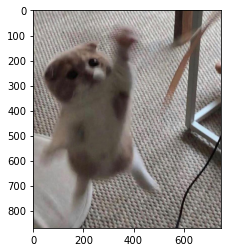

Dimensiones de la imagen: 869x750 (Alto x Ancho)


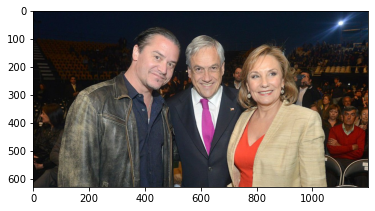

Dimensiones de la imagen: 630x1200 (Alto x Ancho)


In [ ]:
mostrar(images['gatitos'][0])
mostrar(images['Personas'][0])

### 2.2 Clase imagenes [2 puntos].

Ahora que sabemos cómo plotear y cargar una imagen, cree una clase llamada "Imagen" la cumpla las siguientes características:

- [X] Un constructor que tome como argumento una imagen y que lo guarde como un atributo.
- [ ] Un property que maneje self.data y que permita la modificación via setter solo en caso que la imagen sea válida (usando las mismas comprobaciones del constructor).
- [ ] Implemente el método `show()` que muestre la imagen usando la función `plt.show()`.
- [ ] Implemente el método `info(imprimir)` que retorna la información de alto y ancho. Además, si el parámetro imprimir es `Treu`, imprime y luego retorna.
- [ ] Modifique el método mágico $"__mul__"$, $"__add__"$ y $"__sub__"$ para permitir realizar operaciones matemáticas entre el objeto y arrays, int o floats. Realice la función pensando que la operación se puede aplicar tanto para izquierda y derecha.
- [ ] Es importante que para las operaciones $"__add__"$ y $"__sub__"$ implementen una saturación de las imágenes. Es decir, la suma o resta deben dar como valor máximo 255.
- [ ] Para el caso de $"__mul__"$ deben implementar un método que nos permita saturar las imágenes y también no nos permita obtener valores inferiores a cero.

Implementadas los Metodos Funcionales, muestre con un ejemplo la funcionalidad de cada una de estas.

**Nota:** 
- Reutilicen el código implementado en las celdas anteriores, pero no invoquen directamente esas funciones.
- Recuerde utilizar aplicar Docstring en sus funciones.
- ¿Sera perjudicial saturar las operaciones en 255 o tener como valor mínimo el 0 en las multiplicaciones? (No es necesario que respondan)



```python
 def __init__(self, img=None):
```

In [ ]:
class Imagen:
    
    def __init__(self, img):
        if isinstance(img, np.ndarray):
            if img.ndim != 3:
                raise ("El argumento debe ser un arreglo de numpy de solo 3 dimensiones")
            if img.shape[-1] != 3:
                raise (
                    "El argumento debe ser un arreglo de numpy de solo 3 dimensiones "
                    "tal que la última dimensión solo tiene 3 canales"
                )
            self.data = img
        else:
            raise TypeError(
                "Debes entregar un arreglo de numpy como argumento del constructor de "
                "Imagen"
            )

    @property
    def imagen(self):
        """Retorna el arreglo con los datos.

        Returns
        -------
        np.ndarray
            Arreglo con la imagen
        """        



    @imagen.setter
    def imagen(self, imagen):
        """Setter para una nueva imagen. Debe cumplir las mismas condiciones que el 
        constructor inicial. Hint, usar el mismo código del constructor.

        Parameters
        ----------
        imagen : Union[np.array]
            
        """
        pass

    def show(self):
        """Muestra la imágen contenida en la propiedad imagen usando plotly.
        Lo mismo que la función mostrar_imagen.
        """

        pass

    def info(self):
        """ Imprime las características de la imagen cargada: Alto y ancho.
        """

        pass

    def __add__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el máximo.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

    def __radd__(self, other):
        """Operación conmutativa de __add__.

        Hint: debería llamar a __add__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

    def __sub__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Restar y luego que en cada pixel mayor a 255 sea asignado el máximo.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

    def __rsub__(self, other):
        """Operación conmutativa de __sub__.

        Hint: debería llamar a __sub__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

    def __mul__(self, other):
        """Redefine la operación + entre imagen y escalar.

        # Idea, usar indexado condicial (similar a los filtros de pandas).
        # Sumar y luego que en cada pixel mayor a 255 sea asignado el máximo y 
        # cada valor inferior a 0 debe ser 0.
        # Ver los tests para mas información.

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

    def __rmul__(self, other):
        """Operación conmutativa de __mul__.

        Hint: debería llamar a __mul__...

        Parameters
        ----------
        other : Union[int, np.ndarray]
            Escalar o arreglo que será sumado a cada pixel de la imagen
        """
        pass

**Resultados esperados:**

In [ ]:
gatito = Imagen(images["gatitos"][1])
niño = Imagen(images["Personas"][1])

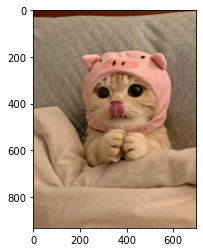

Caracteristicas de la imagen cargada:
Alto: 933
Ancho: 700


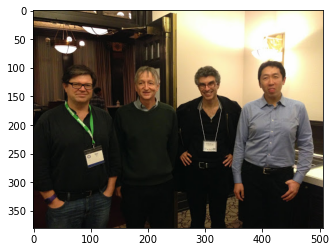

Caracteristicas de la imagen cargada:
Alto: 380
Ancho: 506


In [ ]:
# Test show e info.
gatito.show()
gatito.info()

niño.show()
niño.info()

In [ ]:
# Tests de los overload de operadores.

# Test __add__
# Idea del test: Todos los elementos de la imagen deben ser a lo más 255.
assert all(np.max(1000 + gatito) == 255)

# Test __radd__
assert all(np.max(gatito + 1000) == 255)

# Test __sub__
assert all(np.max(1000 - gatito) == 255)

# Test __rsub__
assert all(np.max(1000 + gatito) == 255)

# Test __mul__
assert all(np.max(100 * gatito) == 255)

# Test __rmul__
assert all(np.max(gatito * 100) == 255)

### 2.3 Clase de Procesamiento de Imagenes [2,5 puntos]

Ahora que comprenden las diferentes dimensiones que componen a una imagen (en la práctica), ahora realizaremos diferentes tareas de procesamiento de imágenes. Para esto, deben crear una clase llamada "ProcImage" que cumpla los siguientes requisitos:

- [ ] Pasar una imagen a escala de grises, para esto utilice la ecuación (1) expuesta en este mismo notebook.
- [ ] Obtener los canales R, G y B de forma individual.
- [ ] Crear una función que pase a negativo de la imagen alojada.
- [ ] Mejorar el contraste de una imagen.
- [ ] Realizar una convolución sobre la imagen.

**NOTA**: 
- Todo debe tomar una Imagen y retornar una nueva Imagen.

**Nota 2**: Esta clase debe estar compuesta pór métodos estáticos.

In [ ]:
# Math es una clase con metodos estáticos. Es decir, no necesita ser instanciada para 
# acceder a sus métodos.

import math

math.log(10)

# Se puede implementar métodos estáticos usando el decorador @staticmethod antes de la 
# definición del método.

2.302585092994046

In [ ]:
class ProcImage:
    @staticmethod
    def negative(img_in):
        pass
        
    @staticmethod
    def img2gray(img_in):
        pass
            
    @staticmethod
    def img2RGB(img_in, canal_de_color):
        pass
        
    @staticmethod
    def img2contrast(img_in, C):
        pass
        
    @staticmethod
    def conv_channel(img_in, kernel):
        img = img_in.imagen
        img_out = []
        for i in range(img.shape[-1]):
            img_channel = convolve2d(img[:, :, i], 
                                     kernel, 
                                     mode="same", 
                                     boundary="symm")
            img_out.append(img_channel)
        return Imagen(np.stack(img_out, axis=2).astype("int"))

### 2.4 Probar [0,5 puntos]

**Respuesta Esperada**:

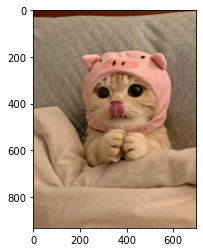

Dimensiones de la imagen: 933x700 (Alto x Ancho)


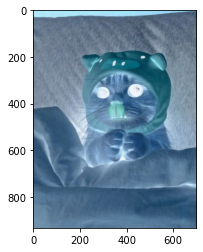

Dimensiones de la imagen: 933x700 (Alto x Ancho)


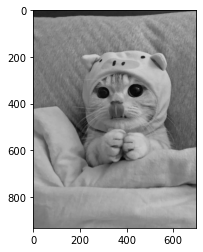

Dimensiones de la imagen: 933x700 (Alto x Ancho)


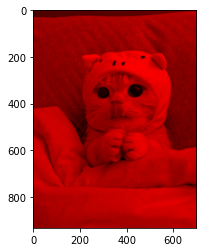

Dimensiones de la imagen: 933x700 (Alto x Ancho)


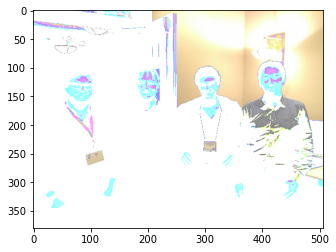

Dimensiones de la imagen: 380x506 (Alto x Ancho)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


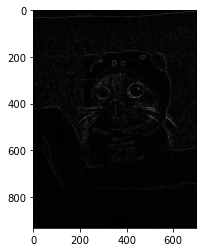

Dimensiones de la imagen: 933x700 (Alto x Ancho)


In [ ]:
mostrar((gatito).imagen)

mostrar(ProcImage.negative(gatito).imagen)

mostrar(ProcImage.img2gray(gatito).imagen)

mostrar(ProcImage.img2RGB(gatito, "r").imagen)

mostrar(ProcImage.img2contrast(niño, 0).imagen)

# Convolución
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])

mostrar(ProcImage.conv_channel(gatito, kernel).imagen)



**Comente:**

```
Escriba aquí su justificación
```

### Implementar 5 Kernels y probarlos con las imagenes [0,5 punto]

Referencia: 
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
# Convolución
kernel_1 = np.array(...)

mostrar(ProcImage.conv_channel(gatito, kernel_1).imagen)

**Hasta aquí llega la tarea. Lo siguiente es solo bonus**

---

## 3. Secuencias y Detección de Movimiento - [Bonus - 1 punto]

**Nota:** De aquí hacia adelante puedes obtener **1 Punto** para la evaluación de esta tarea 😱😱😱.

### 3.1 Clase Secuencia de imágenes
Implemente la Clase SecuenciaImagenes() para cargar conjuntos de imágenes secuenciales. Para esto la clase deberá cumplir los siguientes requisitos:

- [ ] Crear el constructor que inicializará el objeto SecuenciaImagenes.
- [ ] Un property que maneje self.data y que permita la modificación vía setter solo en caso de que la secuencia de imágenes sea válida (usando las mismas comprobaciones del constructor).
- [ ] Implementar el método `.show(id)` para mostrar la imagen ubicada en la posición dada por el argumento.
- [ ] Implemente el método `.show_animation()` para mostrar la secuencia en movimiento.



In [ ]:
path = './secuencia_plaza/'
img_names = os.listdir(path)

imagenes = np.array(list(map(lambda img: np.array(Image.open(path+img)), img_names)))

In [ ]:
class SecuenciaImagenes:
    def __init__(self, imgs):
        pass

    @property
    def sec(self):
        pass

    @sec.setter
    def sec(self, imagen):
        pass

    def show(self, id):
        pass

    def show_animation():
        # Referencias:
        # https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
        pass

**Resultados esperados:**

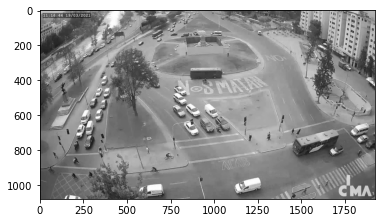

In [ ]:
plaza = SecuenciaImagenes(imagenes)
plazaBW.show(1)

### 3.2. Secuencia de Imagenes


A continuación, deben programar una función que nos permite resaltar los objetos en movimientos de una secuencia de imágenes. Para esta parte del laboratorio, deberá utilizar las imágenes dispuestas en la carpeta "secuencia_plaza" del archivo zip subido a material docente. 

Primero que todo, cargue la secuencia de imágenes que se encuentran en el directorio. Para esto, se recomienda utilizar el comando "os.listdir(dir)", ya que este le facilitará la carga de un gran número de imágenes (pruebe el comando y vea que sucede).



![plaza se mueve](https://media0.giphy.com/media/ZAzlopoHETs5lZQ6EZ/giphy.gif "plaza")

Para realizar este ejercicio utilizaremos un método super básico para la eliminación de fondo. Para esto sigue la siguiente receta:
 1. Pase a escala de grises todas las imágenes secuenciales.
 2. Almacene en una variable la resta de las imágenes consecutivas.

   \begin{equation*}
    imagen\_out = imagen(t) - imagen(t+1) \tag{2}
    \end{equation*}

 3. Establezca un umbral para eliminar algunos artefactos. Pruebe con al menos 3 umbrales.

\begin{equation*}
    imagen\_out = imagen\_out> Umbral \tag{3}
    \end{equation*}

**Nota**: No es necesario que construya una clase para esta parte.

In [ ]:
def dect_mov(sec_img, umbral=30):
        pass

### 3.3 Resultado

Ahora es tiempo de relajarse y ver si nuestro experimento logra resaltar los objetos en movimiento de esta polémica Plaza, para esto solo ejecute el siguiente Código y espere. 

In [ ]:
imageio.mimsave('plaza.gif', dect_mov(plaza))

**Ejemplo de resultado esperado:**

![resultados](https://media3.giphy.com/media/SKV3bgUzHt0MLJTWW2/giphy.gif "res")

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.giphy.com/media/5xtDaroSIXzLa6dvfI4/giphy.gif "cerati")


### Referencias lab 1.

- http://www.cs.cornell.edu/cv/SummerSchool/Introduction.pdf
- https://en.wikipedia.org/wiki/Tensor
- https://support.ptc.com/help/mathcad/es/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html
- http://w3.unpocodetodo.info/canvas/negativo.php
- http://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>